<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [2]:
student_number = '99105431'
first_name = 'AmirMahdi'
last_name = 'Daraei'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from cvxopt import matrix, solvers

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable.

In [165]:
data = pd.read_csv("./Data/satimage.csv")

X = data.drop(columns=["label"])
y = data["label"]

Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [166]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.625, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [167]:
train_mask = (y_train == 4) | (y_train == 6)
val_mask = (y_val == 4) | (y_val == 6)
test_mask = (y_test == 4) | (y_test == 6)

X_train = X_train[train_mask]
y_train = y_train[train_mask].map({4: -1, 6: 1})

X_val = X_val[val_mask]
y_val = y_val[val_mask].map({4: -1, 6: 1})

X_test = X_test[test_mask]
y_test = y_test[test_mask].map({4: -1, 6: 1})

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Model (50 points)

Here is soft margin svm convex optimization formulation.
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

To formulate the dual of the soft margin SVM optimization problem, we utilize the concept of Lagrange multipliers. This approach is particularly useful as it converts a constrained optimization problem into an unconstrained one, and also lends itself well to the application of kernel methods in SVMs.

### **Primal Problem**:

Given the primal formulation:
$$
\begin{aligned}
\text { Minimize } & \quad \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i \\
\text { Subject to } & \quad y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad i = 1, 2, \ldots, N \\
& \quad \xi_i \geq 0, \quad i = 1, 2, \ldots, N
\end{aligned}
$$

### **Lagrangian**:

To derive the dual, first define the Lagrangian $\mathcal{L}$ incorporating Lagrange multipliers $\alpha_i$ for the inequality $y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i$ and $\mu_i$ for $(\xi_i \geq 0)$.

$$
\mathcal{L}(\mathbf{w}, b, \xi, \alpha, \mu) = \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i - \sum_{i=1}^N \alpha_i [y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i] - \sum_{i=1}^N \mu_i \xi_i
$$

### **Dual Derivation**:

1. **Gradient zero conditions**:

 Differentiate $\mathcal{L}$ w.r.t. $\mathbf{w}$, $b$, and $\xi_i$ and set the derivatives to zero.
   
   - $\mathbf{w}$: $\mathbf{w} - \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i = 0$ $\Rightarrow$ $\mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i$

   - $b$: $\sum_{i=1}^N \alpha_i y_i = 0$

   - $\xi_i$: $C - \alpha_i - \mu_i = 0$ $\Rightarrow$ $\mu_i = C - \alpha_i$

2. **Substitute back into $\mathcal{L}$**:

 Eliminate $\mathbf{w}$, $b$, and $\xi_i$ using the conditions derived to express the dual function solely in terms of $\alpha$.

### **Dual Problem**:

The dual problem maximizes the dual function derived by substituting the gradient zero conditions back into $\mathcal{L}$:

$$
\begin{aligned}
\text { Maximize } & \quad \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j \\
\text { Subject to } & \quad \sum_{i=1}^N \alpha_i y_i = 0 \\
& \quad 0 \leq \alpha_i \leq C, \quad i = 1, 2, \ldots, N
\end{aligned}
$$

This maximization is subject to the constraints that the coefficients $\alpha_i$ are non-negative and do not exceed the penalty parameter $C$, and the sum of the products of $\alpha_i$ and $y_i$ over all samples must be zero. This dual formulation allows the use of the kernel trick for non-linear classification by replacing the dot product $\mathbf{x}_i^T \mathbf{x}_j$ with a kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$.

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [168]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    n_samples, n_features = X.shape
    K = np.dot(X, X.T) * np.outer(y, y)
    P = matrix(K)

    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))

    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()

    support_vectors = X
    support_vector_labels = y
    support_vector_alphas = alphas

    return support_vectors, support_vector_labels, support_vector_alphas

In [169]:
C = 1
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train, y_train, C)

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  2e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  1e-13
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  1e-13
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  1e-13
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  1e-13
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  1e-13
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  1e-13
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  1e-13
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  1e-13
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  1e-13
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  1e-13
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  1e-13
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  2e-13
Optimal solution found.


In [170]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    output:print(f'gamma: {gamma}')
        y_pred: predictoin labels
    """

    kernel_product = np.dot(x_test, support_vectors.T)
    decision_values = np.dot(kernel_product, support_vector_alphas * support_vector_labels)
    y_pred = np.sign(decision_values)
    return y_pred

In [171]:
y_pred = predict_labels(np.array(X_test), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [172]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8252788104089219
Balanced Accuracy:  0.7639855133496167
Confusion Matrix:
 [[ 96  59]
 [ 35 348]]


<Axes: >

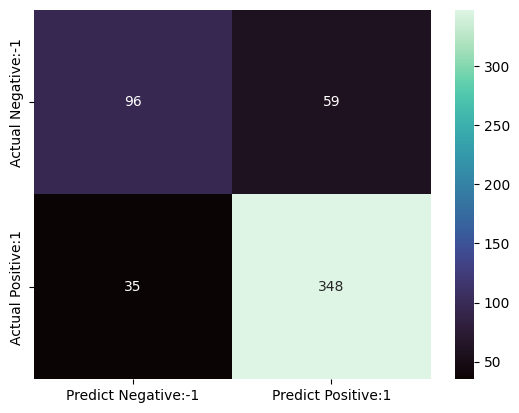

In [173]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [174]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    distance_squared = np.sum((x1 - x2)**2)
    output = np.exp(-gamma * distance_squared)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()
    support_vectors = X
    support_vector_labels = y
    support_vector_alphas = alphas

    return support_vectors, support_vector_labels, support_vector_alphas

In [175]:
gammas = [0.01, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best_acc = None

for gamma in gammas:
    print(f'gamma = {gamma}')
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_val, y_val, C=1.0, gamma=gamma)
    y_pred = predict_labels(np.array(X_test), support_vectors, support_vector_labels, support_vector_alphas)
    acc, balanced_acc, cm = evaluate(y_test, y_pred)
    if best_acc is None or balanced_acc > best_acc:
        best_acc = balanced_acc
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas
        best_gamma = gamma
    print()

print(f'best gamma: {best_gamma}')

gamma = 0.01
     pcost       dcost       gap    pres   dres
 0: -1.5833e+02 -7.2035e+02  3e+03  2e+00  5e-15
 1: -1.1278e+02 -4.4552e+02  4e+02  1e-01  4e-15
 2: -1.2405e+02 -1.7900e+02  6e+01  2e-02  4e-15
 3: -1.3712e+02 -1.5472e+02  2e+01  4e-03  5e-15
 4: -1.4177e+02 -1.4733e+02  6e+00  9e-04  5e-15
 5: -1.4328e+02 -1.4513e+02  2e+00  2e-04  5e-15
 6: -1.4385e+02 -1.4435e+02  5e-01  5e-05  6e-15
 7: -1.4405e+02 -1.4408e+02  2e-02  1e-06  6e-15
 8: -1.4406e+02 -1.4406e+02  6e-04  3e-08  6e-15
 9: -1.4406e+02 -1.4406e+02  2e-05  8e-10  6e-15
Optimal solution found.
Accuracy:  0.8066914498141264
Balanced Accuracy:  0.7125242146045649
Confusion Matrix:
 [[ 76  79]
 [ 25 358]]

gamma = 0.1
     pcost       dcost       gap    pres   dres
 0: -9.4677e+01 -6.5677e+02  3e+03  2e+00  2e-15
 1: -7.4100e+01 -3.7439e+02  3e+02  7e-02  2e-15
 2: -8.1270e+01 -1.3766e+02  6e+01  1e-02  2e-15
 3: -9.1058e+01 -1.0314e+02  1e+01  2e-03  2e-15
 4: -9.4084e+01 -9.7232e+01  3e+00  3e-04  2e-15
 5: -9.5

In [176]:
y_pred = predict_labels(np.array(X_test), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.8104089219330854
Balanced Accuracy:  0.7439400320053904
Confusion Matrix:
 [[ 91  64]
 [ 38 345]]


<Axes: >

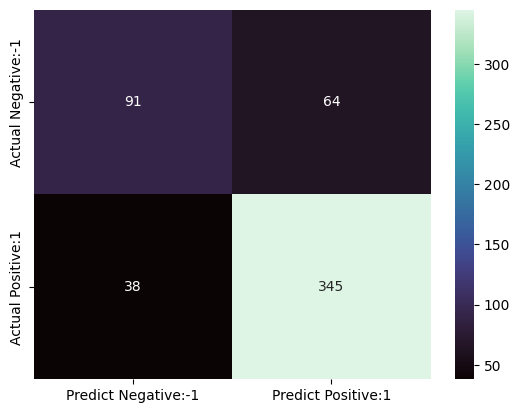

In [177]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [178]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]

grid_params = {
    'C': Cs,
    'gamma': gammas,
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), grid_params, cv=5)
grid_search.fit(X_train, y_train)

print("best C and gamma are:", grid_search.best_params_)
print("best score: ", grid_search.best_score_)

model = grid_search.best_estimator_

best C and gamma are: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
best score:  0.8996732127851608


Implement Multiclass SVM from scratch without using ready functions (optional).

In [179]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    distance_squared = np.sum((x1 - x2)**2)
    output = np.exp(-gamma * distance_squared)
    return output


def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()
    support_vectors = X
    support_vector_labels = y
    support_vector_alphas = alphas

    return support_vectors, support_vector_labels, support_vector_alphas


def svm_multiclass_one_vs_rest(X, y, C, gamma):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        classifiers: A list of tuples containing support vectors, their labels, and alphas for each class.
    """
    classes = np.unique(y)
    classifiers = []
    for c in classes:
        y_binary = np.where(y == c, 1, -1)
        support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X, y_binary, C, gamma)
        classifiers.append((support_vectors, support_vector_labels, support_vector_alphas, c))
    return classifiers

def predict(x_test, classifiers):
    """
    input:
        x_test: test data
        classifiers: List of classifiers (support_vectors, support_vector_labels, support_vector_alphas, class_label).
    output:
        predictions: Predicted labels for x_test.
    """
    predictions = np.zeros((len(X), len(classifiers)))

    for idx, (sv, sv_labels, sv_alphas, class_label) in enumerate(classifiers):
        for i in range(len(X)):
            k = np.array([rbf(X[i], sv_j) for sv_j in sv])
            decision_value = np.sum(sv_alphas * sv_labels * k)
            predictions[i, idx] = decision_value

    predicted_class_indices = np.argmax(predictions, axis=1)
    predicted_classes = [classifiers[idx][3] for idx in predicted_class_indices]
    return predicted_classes

def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

In [184]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

acc = accuracy_score(y_test, y_pred_linear)
balanced_acc = balanced_accuracy_score(y_test, y_pred_linear)
cm = confusion_matrix(y_test, y_pred_linear)

print(f"Accuracy (Linear): {acc}")
print(f"Balanced Accuracy (Linear): {balanced_acc}")
print("Confusion Matrix (Linear):\n", cm)

Accuracy (Linear): 0.8513011152416357
Balanced Accuracy (Linear): 0.820668744209551
Confusion Matrix (Linear):
 [[116  39]
 [ 41 342]]


<Axes: >

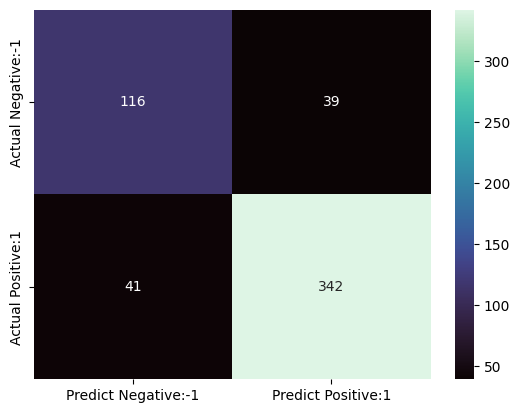

In [185]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

In [192]:
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

acc = accuracy_score(y_test, y_pred_rbf)
balanced_acc = balanced_accuracy_score(y_test, y_pred_rbf)
cm = confusion_matrix(y_test, y_pred_rbf)

print(f"Accuracy (RBF): {acc}")
print(f"Balanced Accuracy (RBF): {balanced_acc}")
print("Confusion Matrix (RBF):\n", cm)

Accuracy (RBF): 0.8754646840148699
Balanced Accuracy (RBF): 0.8683651983491956
Confusion Matrix (RBF):
 [[132  23]
 [ 44 339]]


<Axes: >

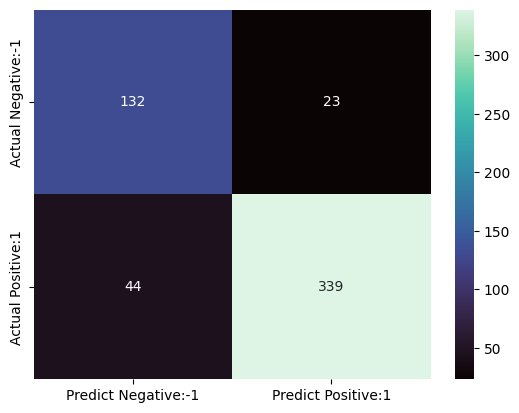

In [193]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

In [197]:
svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)

acc = accuracy_score(y_test, y_pred_poly)
balanced_acc = balanced_accuracy_score(y_test, y_pred_poly)
cm = confusion_matrix(y_test, y_pred_poly)

print(f"Accuracy (Poly): {acc}")
print(f"Balanced Accuracy (Poly): {balanced_acc}")
print("Confusion Matrix (Poly):\n", cm)

Accuracy (Poly): 0.8605947955390335
Balanced Accuracy (Poly): 0.8656026278109998
Confusion Matrix (Poly):
 [[136  19]
 [ 56 327]]


<Axes: >

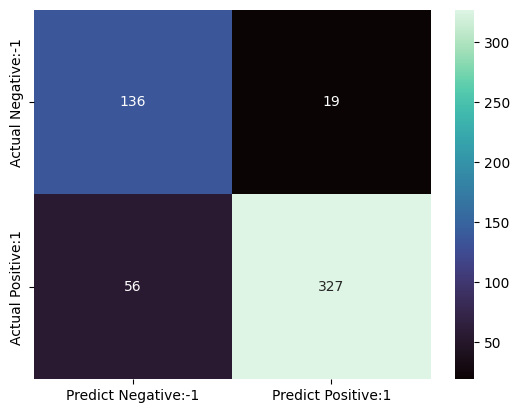

In [198]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

In [202]:
svc_sigmoid = SVC(kernel='sigmoid', gamma='auto')
svc_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_val)

acc = accuracy_score(y_val, y_pred_sigmoid)
balanced_acc = balanced_accuracy_score(y_val, y_pred_sigmoid)
cm = confusion_matrix(y_val, y_pred_sigmoid)

print(f"Accuracy (Sigmoid): {acc}")
print(f"Balanced Accuracy (Sigmoid): {balanced_acc}")
print("Confusion Matrix (Sigmoid):\n", cm)

Accuracy (Sigmoid): 0.7242424242424242
Balanced Accuracy (Sigmoid): 0.6766933287950987
Confusion Matrix (Sigmoid):
 [[ 57  47]
 [ 44 182]]


<Axes: >

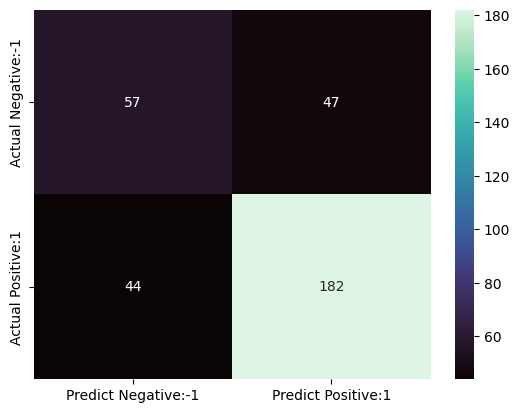

In [203]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

## **Linear**
- **Advantages:**
  - **Simplicity and Speed:** Linear kernels are the fastest to compute among the kernels because they do not involve any additional computation or parameter tuning (except for `C`). They are best when the data is already linearly separable.
  - **Interpretability:** Models built with linear kernels are easier to interpret, which can be important in certain applications (like medical or financial) where understanding the decision-making process is crucial.
- **Disadvantages:**
  - **Limited Complexity:** Linear kernels cannot model more complex relationships in the data. They cannot capture interactions between features since they only consider a linear decision boundary.

## **Gaussian RBF**
- **Advantages:**
  - **Flexibility:** RBF kernels can model complex boundaries due to their ability to map samples nonlinearly into a higher-dimensional space, making them very effective for non-linear datasets.
  - **Less Hyperparameters:** RBF kernels primarily depend on the parameter `gamma`, which defines how much influence a single training example has. The right `gamma` and `C` can model complex nonlinear patterns.
- **Disadvantages:**
  - **Computationally Intensive:** They require more computation to train and predict, especially as the number of support vectors grows.
  - **Overfitting Risk:** If `gamma` is set too high, the model might overfit, considering even the smallest fluctuations in the data (high `gamma` values make the boundary decision more sensitive to individual points).

## **Polynomial**
- **Advantages:**
  - **Versatility:** Polynomial kernels can model varying degrees of curvature in the decision boundary by adjusting the degree of the polynomial. This allows the model to fit more complex patterns than a linear kernel.
  - **Feature Interaction:** They inherently consider interactions up to the polynomial degree, which can be beneficial in understanding feature interactions in the data.
- **Disadvantages:**
  - **Computation Cost:** Higher-degree polynomials increase the model complexity and computational cost.
  - **Parameter Sensitivity:** Requires careful tuning of parameters (`degree`, `C`, and `c0`) which can be time-consuming and sensitive to overfitting with higher degrees.

## **Sigmoid**
- **Advantages:**
  - **Neural Network Analogy:** The sigmoid kernel function resembles the activation function used in neural networks, providing a perceptron-like decision boundary.
  - **Capability to Handle Non-linearity:** Like the RBF, it can handle non-linear relationships in the data.
- **Disadvantages:**
  - **Non-Positive Definiteness:** The sigmoid kernel is not always positive definite, which can lead to issues in certain SVM implementations.
  - **Less Commonly Used:** It is less commonly used for SVM classification due to its complex nature and potential for not fulfilling Mercer's condition, which can result in SVM not converging.

### **Overall Comparison**
- **Linear** is best for large feature spaces where the relationship among features is approximately linear.
- **RBF** is highly effective for cases where the relationship between class labels and attributes is nonlinear.
- **Polynomial** offers a compromise between the complexity of RBF and the simplicity of linear kernels, with control over the model complexity via the degree.
- **Sigmoid** kernel can be more challenging to use effectively due to its properties and is less common in SVM classifications but can be useful in specific scenarios mimicking neural activation functions.

Choosing the right kernel and tuning its parameters are crucial for the performance of SVMs and depend heavily on the specific data and problem at hand. For most practical applications, RBF tends to be a default choice due to its flexibility and effectiveness across a wide range of tasks.